The predicted classes for the test set are
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0
 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0]



The accuracy of the prediction is
0.965


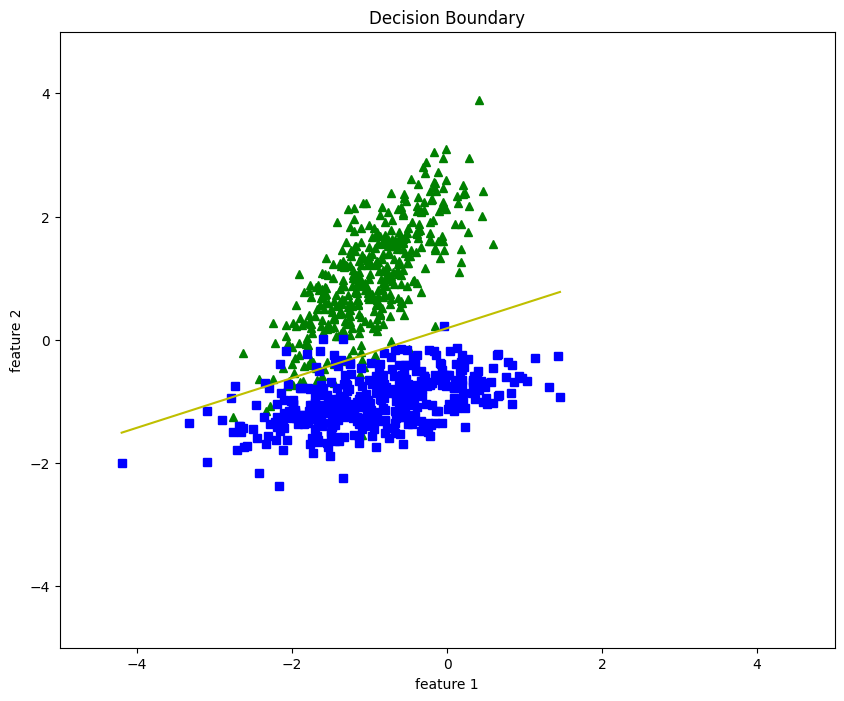

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

def normalize(X):
    m,n=X.shape
    for i in range(n):
        X[i]=(X[i]-X.mean(axis=0))/X.std(axis=0)
    return X

def sigmoid(X):
    return 1.0/(1+np.exp(-X))

def gradients(X,Y,yBar):
    m=X.shape[0]
    dw=(1/m)*np.dot(X.T,(yBar-Y))
    db=(1/m)*np.sum(yBar-Y)
    return dw,db

def loss(y,yBar):
    loss=-np.mean(y*(np.log(yBar))-(1-y)*(np.log(1-yBar)))
    return loss

def Train(X,Y,batchSize,epochs,learningRate):
    m,n=X.shape
    w=np.zeros((n,1))
    b=0
    Y=Y.reshape(m,1)
    X=normalize(X)
    losses=[]
    for epoch in range(epochs):
        for i in range((m-1)//batchSize+1):
            startIndex=i*batchSize
            endIndex=startIndex+batchSize
            Xb=X[startIndex:endIndex]
            Yb=Y[startIndex:endIndex]
            yBar=sigmoid(np.dot(Xb,w)+b)
            dw,db=gradients(Xb,Yb,yBar)
            w-=learningRate*dw
            b-=learningRate*db
        l=loss(Y,sigmoid(np.dot(X,w)+b))
        losses.append(loss)
            
    return w,b,losses

def Predict(X,w,b):
    X=normalize(X)
    preds=sigmoid(np.dot(X,w)+b)
    predictionClass=[]
    for i in preds:
        if(i>0.5):
            predictionClass.append(1)
        else:
            predictionClass.append(0)
    return np.array(predictionClass)

def accuracy(Y_test,YPred):
    accuracy=np.sum(Y_test==YPred)/len(Y_test)
    return accuracy

def plot(X, w, b):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y_train==0], X[:, 1][Y_train==0], "g^")
    plt.plot(X[:, 0][Y_train==1], X[:, 1][Y_train==1], "bs")
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')    
    plt.plot(x1, x2, 'y-')

X,Y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X1=[]
X2=[]
weights,bias,losses=Train(X_train,Y_train,10,500,0.01)
ans=Predict(X_test,weights,bias)
print("The predicted classes for the test set are")
print(ans)
print("\n\n")
plot(X_train,weights,bias)
accuracy=accuracy(Y_test,ans)
print("The accuracy of the prediction is")
print(accuracy)